In [1]:
import matplotlib.pyplot as plt
from scipy import signal
import numpy as np
import pandas as pd
from matplotlib import cm
import os

In [2]:
os.getcwd() #check os

'D:\\projects\\YPU\\Tai'

In [3]:
df = pd.read_csv("0518mdf.csv")
df = df.rename(columns={'X [s]': 'Time', 'Mini sensor 8: EMG 8->Filter->MDF [Hz]': 'Hz'}) # change col name
df = df.set_index('Time') # col of time as index 
value = df['Hz']
print(df.shape) # check how many data point in xaxis

(720, 1)


In [4]:
1/(df.index[1]-df.index[0]) # check sampling rate

16.030956161090014

<AxesSubplot:xlabel='Time'>

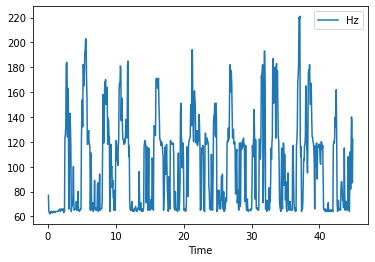

In [5]:
df.plot() # plot signal 

<ipython-input-6-9101876975be>:7: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(times, freqs, 20 * np.log10(Sxx/1e-06), cmap='inferno')


Text(0.5, 0, 'Time')

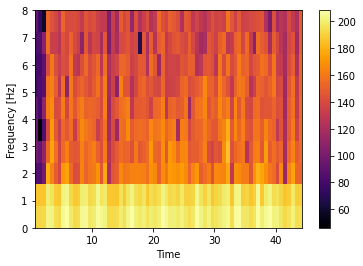

In [6]:
rate=16  # sampling rate 
Block_size=20 # set window size
freqs, times, Sxx = signal.spectrogram(value, fs=rate, window='hanning',
                                      nperseg=Block_size, noverlap=0.5*Block_size,
                                      detrend=False, scaling='spectrum') # noverlap set how many % will be repeat each window
plt.figure()
plt.pcolormesh(times, freqs, 20 * np.log10(Sxx/1e-06), cmap='inferno')
plt.colorbar()
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time')